In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
obje_sutun = data.select_dtypes(include="object").columns
for sutun in data[obje_sutun]:
    print(data[sutun].value_counts())


male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [41]:
for sutun in data[obje_sutun]:
    for index,value in enumerate(data[sutun].unique()):
        data[sutun] = data[sutun].replace(value,index)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [42]:
data.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.038101
charges     1.515880
dtype: float64

In [43]:
data =  pd.DataFrame(PowerTransformer().fit_transform(data),columns=data.columns)

In [44]:
korelasyon = data.corr()
korelasyon["charges"].sort_values(ascending=False)

charges     1.000000
age         0.522391
children    0.166913
bmi         0.138868
region      0.041350
sex         0.008697
smoker     -0.675662
Name: charges, dtype: float64

In [45]:
x = data.drop(columns=['charges'], axis=1)
y = data['charges']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1070
268
1070
268


In [47]:
mms = MinMaxScaler()
x_train_s = mms.fit_transform(x_train)
x_test_s = mms.transform(x_test)

In [48]:
model = LinearRegression()
model.fit(x_train_s, y_train)
pred = model.predict(x_test_s)

In [49]:
print(f"r2_score : {r2_score(y_test,pred)}")
print(f"score : {model.score(x_test_s, y_test)}")
print(f"mse : {mean_squared_error(y_test,pred)}")

r2_score : 0.8062398282218279
score : 0.8062398282218279
mse : 0.20626247574896997


In [50]:
#Çapraz Doğrulama
model = LinearRegression()
skor = cross_val_score(model, x, y, cv=5, scoring='r2')

In [51]:
caprazsonuc = {
    "5-Katlı Çapraz Doğrulama R² Skorları": skor,
    "Ortalama R² Skoru": np.mean(skor),
    "Standart Sapma R² Skoru": np.std(skor)
}
caprazsonuc

{'5-Katlı Çapraz Doğrulama R² Skorları': array([0.80191222, 0.69145953, 0.83726712, 0.77218226, 0.73535411]),
 'Ortalama R² Skoru': 0.7676350478242137,
 'Standart Sapma R² Skoru': 0.050772029241704236}

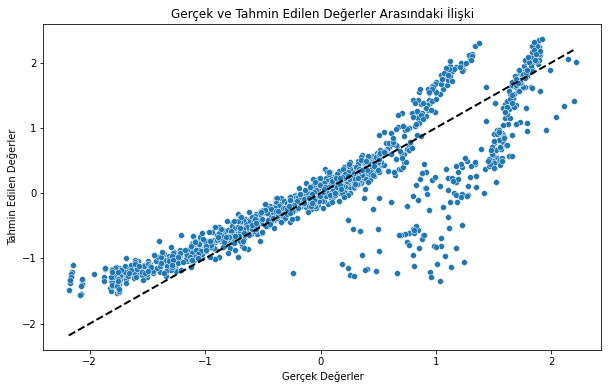

In [52]:
# Tahminler
model.fit(x, y)
y_pred = model.predict(x)

# Gerçek değerler ve tahmin değerleri karşılaştırmasının dağılım grafiği
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler Arasındaki İlişki')
plt.show()

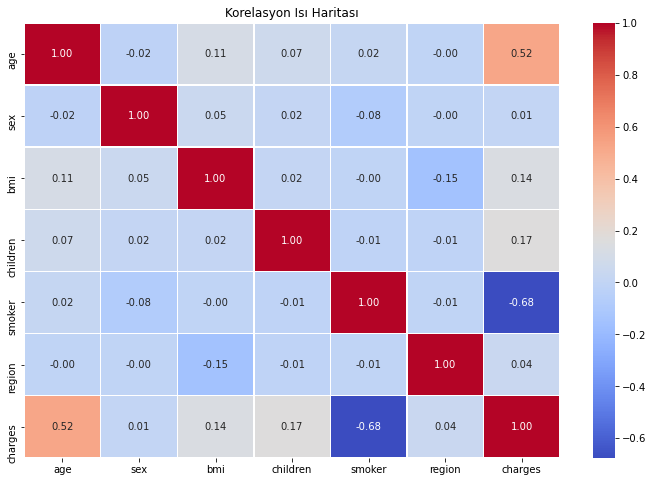

In [54]:
# Korelasyon matrisi
corr_matrix = data.corr()

# Korelasyon ısı haritası (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Isı Haritası')
plt.show()